In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy import stats
from sklearn.linear_model import Perceptron

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [3]:
mpl.rcParams.update({
    'axes.labelsize':7,
    'xtick.labelsize':6,
    'ytick.labelsize':6,
    'figure.dpi':240
})
plt.close('all')

In [4]:
if sklearn.__version__ < "0.20":
    raise Exception("Scikit-Learn version 0.20 or higher is required.")

try:
    df = pd.read_csv(r"C:\New folder\Deep Learning\diabetes.csv")
except FileNotFoundError as e:
    print(f"Error: {e}")
    sys.exit(1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
features = df.drop('Outcome', axis=1)
target = df['Outcome']
scaler = RobustScaler()

scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_df['Outcome'] = target

print(scaled_df.head())
scaled_df.info()

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0          0.6  0.751515       0.000000        0.37500 -0.239686  0.172043   
1         -0.4 -0.775758      -0.333333        0.18750 -0.239686 -0.580645   
2          1.0  1.600000      -0.444444       -0.71875 -0.239686 -0.935484   
3         -0.4 -0.678788      -0.333333        0.00000  0.499018 -0.419355   
4         -0.6  0.484848      -1.777778        0.37500  1.080550  1.193548   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.665359  1.235294        1  
1                 -0.056209  0.117647        0  
2                  0.783007  0.176471        1  
3                 -0.537255 -0.470588        0  
4                  5.007843  0.235294        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies       

C:\Users\anikt\AppData\Local\Temp\ipykernel_35028\1631127975.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
C:\Users\anikt\AppData\Local\Temp\ipykernel_35028\1631127975.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=45)


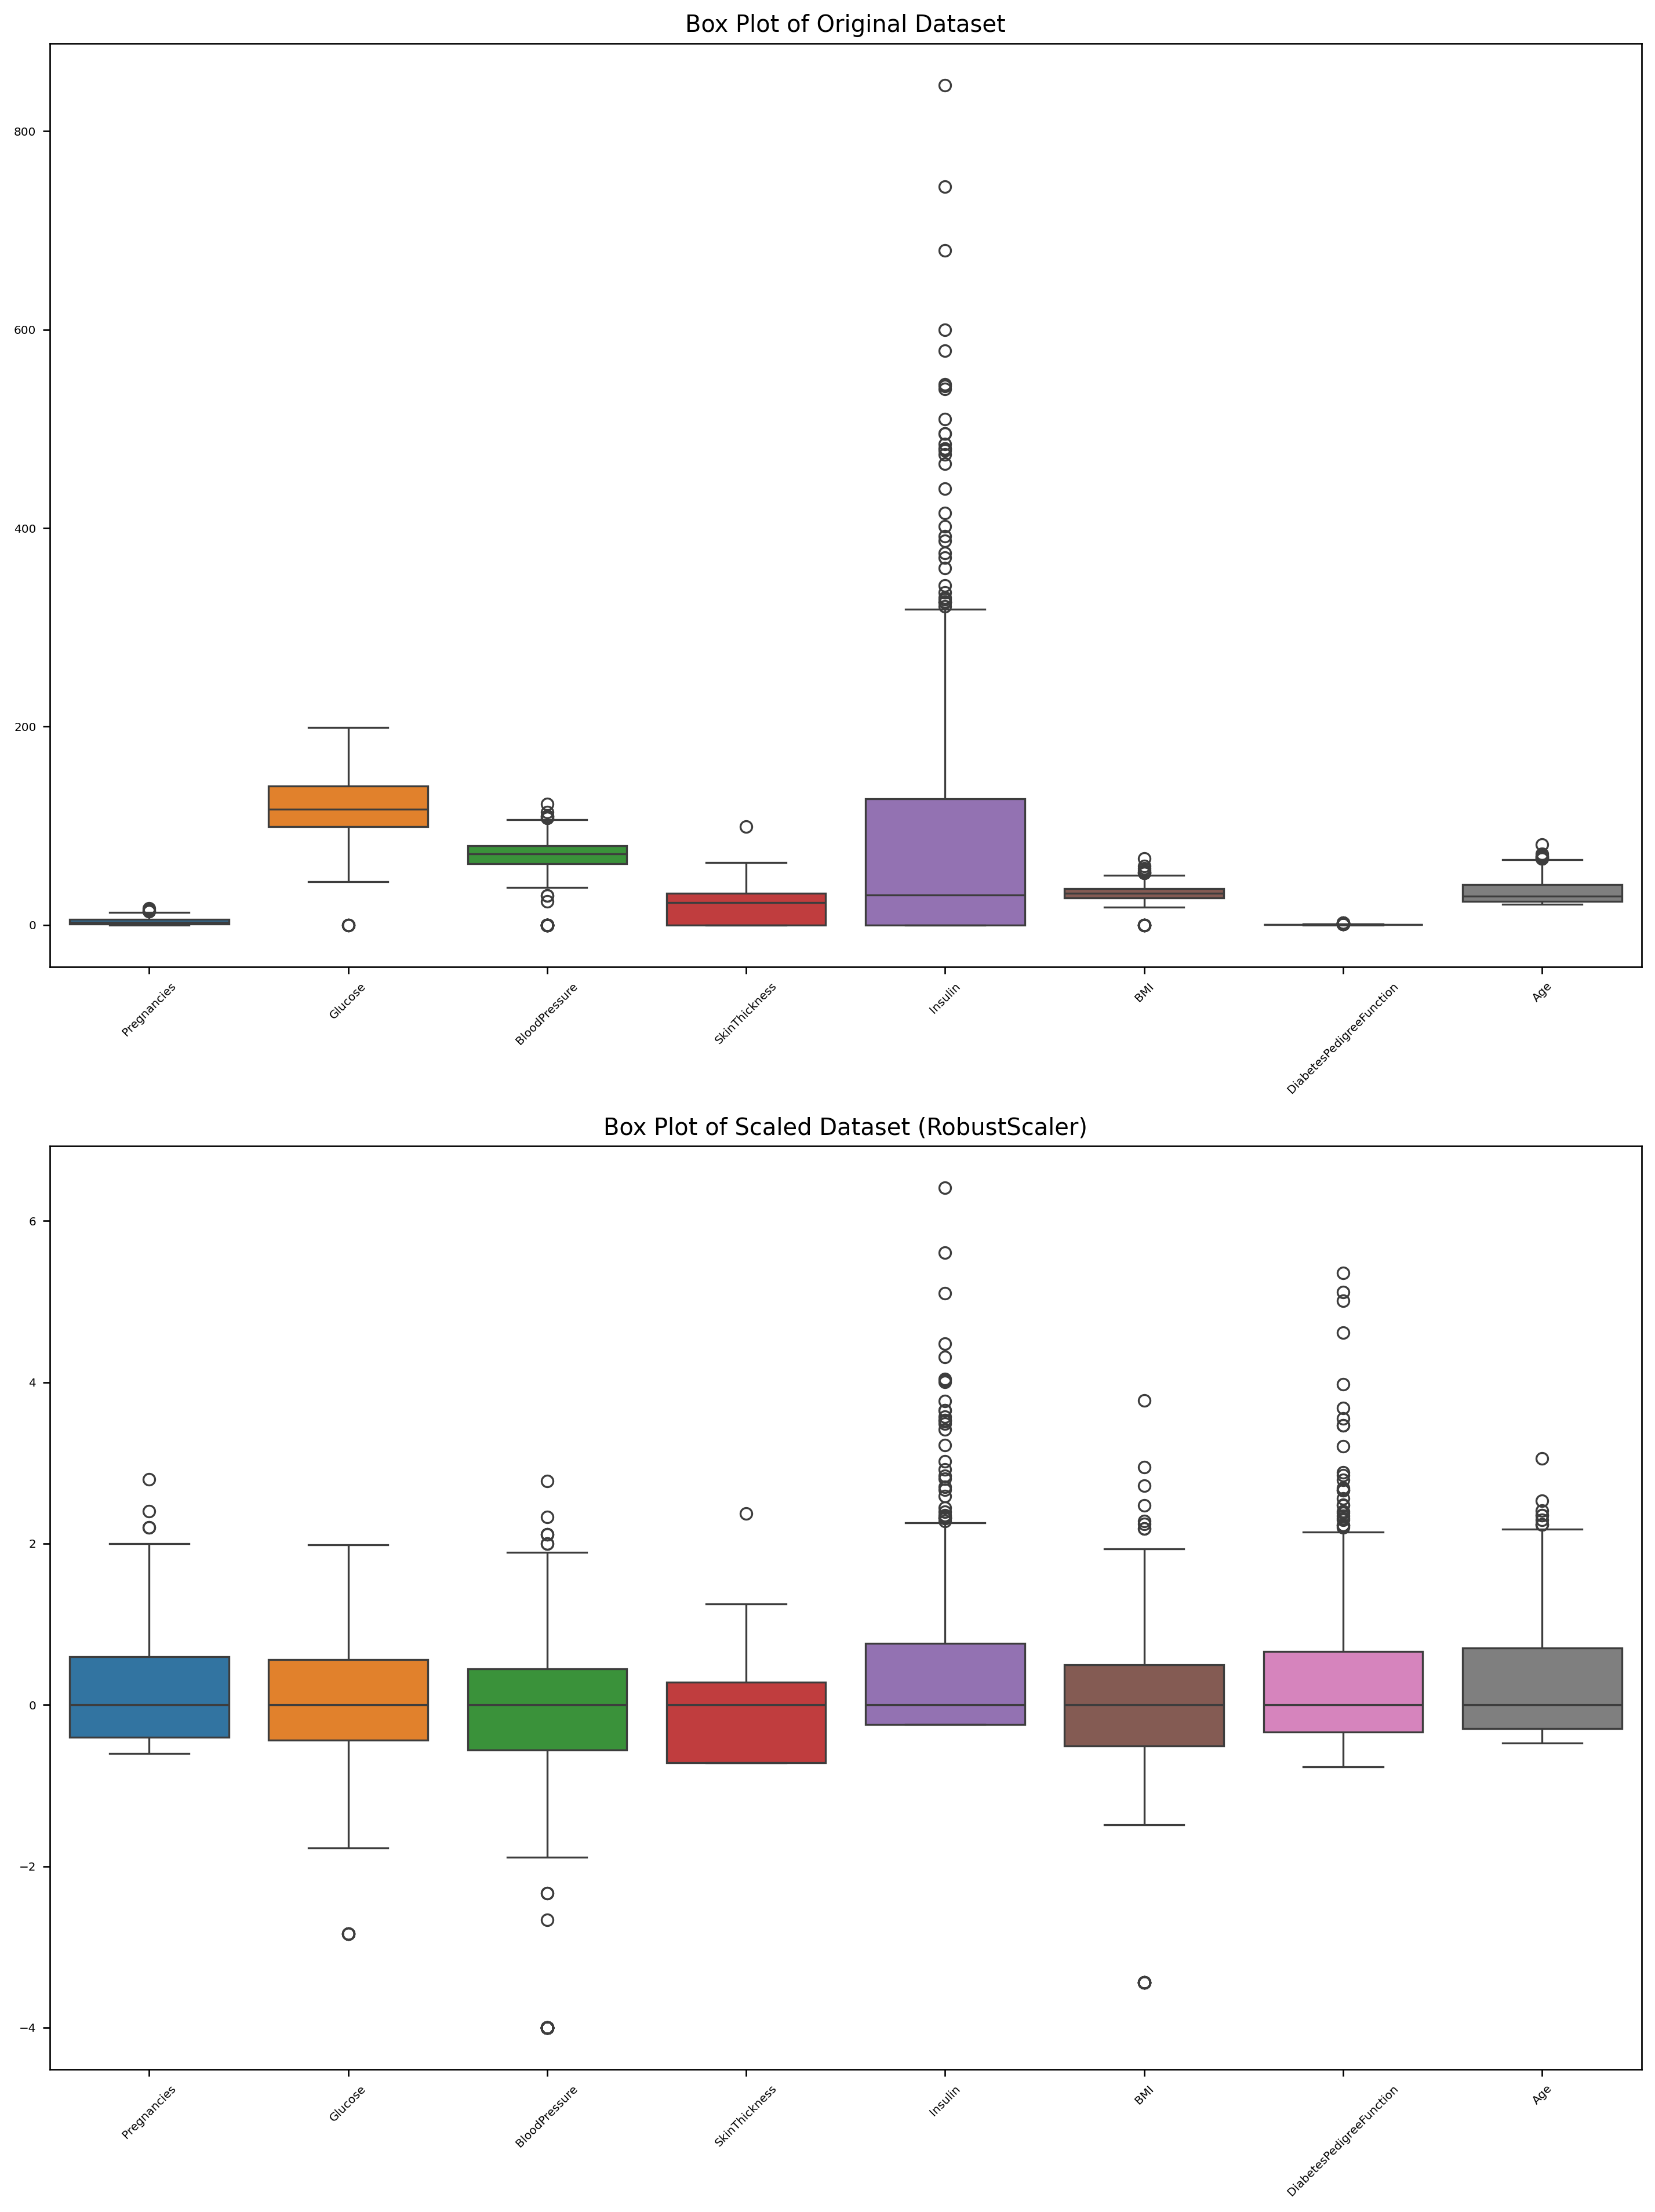

In [13]:
fig, axes = plt.subplots(2, 1, figsize=(12,16))

sns.boxplot(data=features, ax=axes[0])
axes[0].set_title('Box Plot of Original Dataset')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

sns.boxplot(data=scaled_df.drop('Outcome', axis=1), ax=axes[1])
axes[1].set_title('Box Plot of Scaled Dataset (RobustScaler)')
axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

In [15]:
Q1 = scaled_df.quantile(0.25)
Q3 = scaled_df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((scaled_df < (Q1 - 1.5 * IQR)) | (scaled_df > (Q3 + 1.5 * IQR))).any(axis=1)
print(f"Number of outliers: {outliers.sum()}")

cleaned_df = scaled_df[~outliers]

print(f"Original dataset shape: {scaled_df.shape}")
print(f"Cleaned dataset shape: {cleaned_df.shape}")

Number of outliers: 129
Original dataset shape: (768, 9)
Cleaned dataset shape: (639, 9)


In [17]:
X = cleaned_df.drop('Outcome', axis=1).values
y = cleaned_df['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

perceptron = Perceptron(max_iter=1000, tol=1e-3)
perceptron.fit(X_train, y_train)

y_pred = perceptron.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.7500
Precision: 0.5556
Recall: 0.5556
F1-score: 0.5556


In [20]:
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[76 16]
 [16 20]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        92
           1       0.56      0.56      0.56        36

    accuracy                           0.75       128
   macro avg       0.69      0.69      0.69       128
weighted avg       0.75      0.75      0.75       128



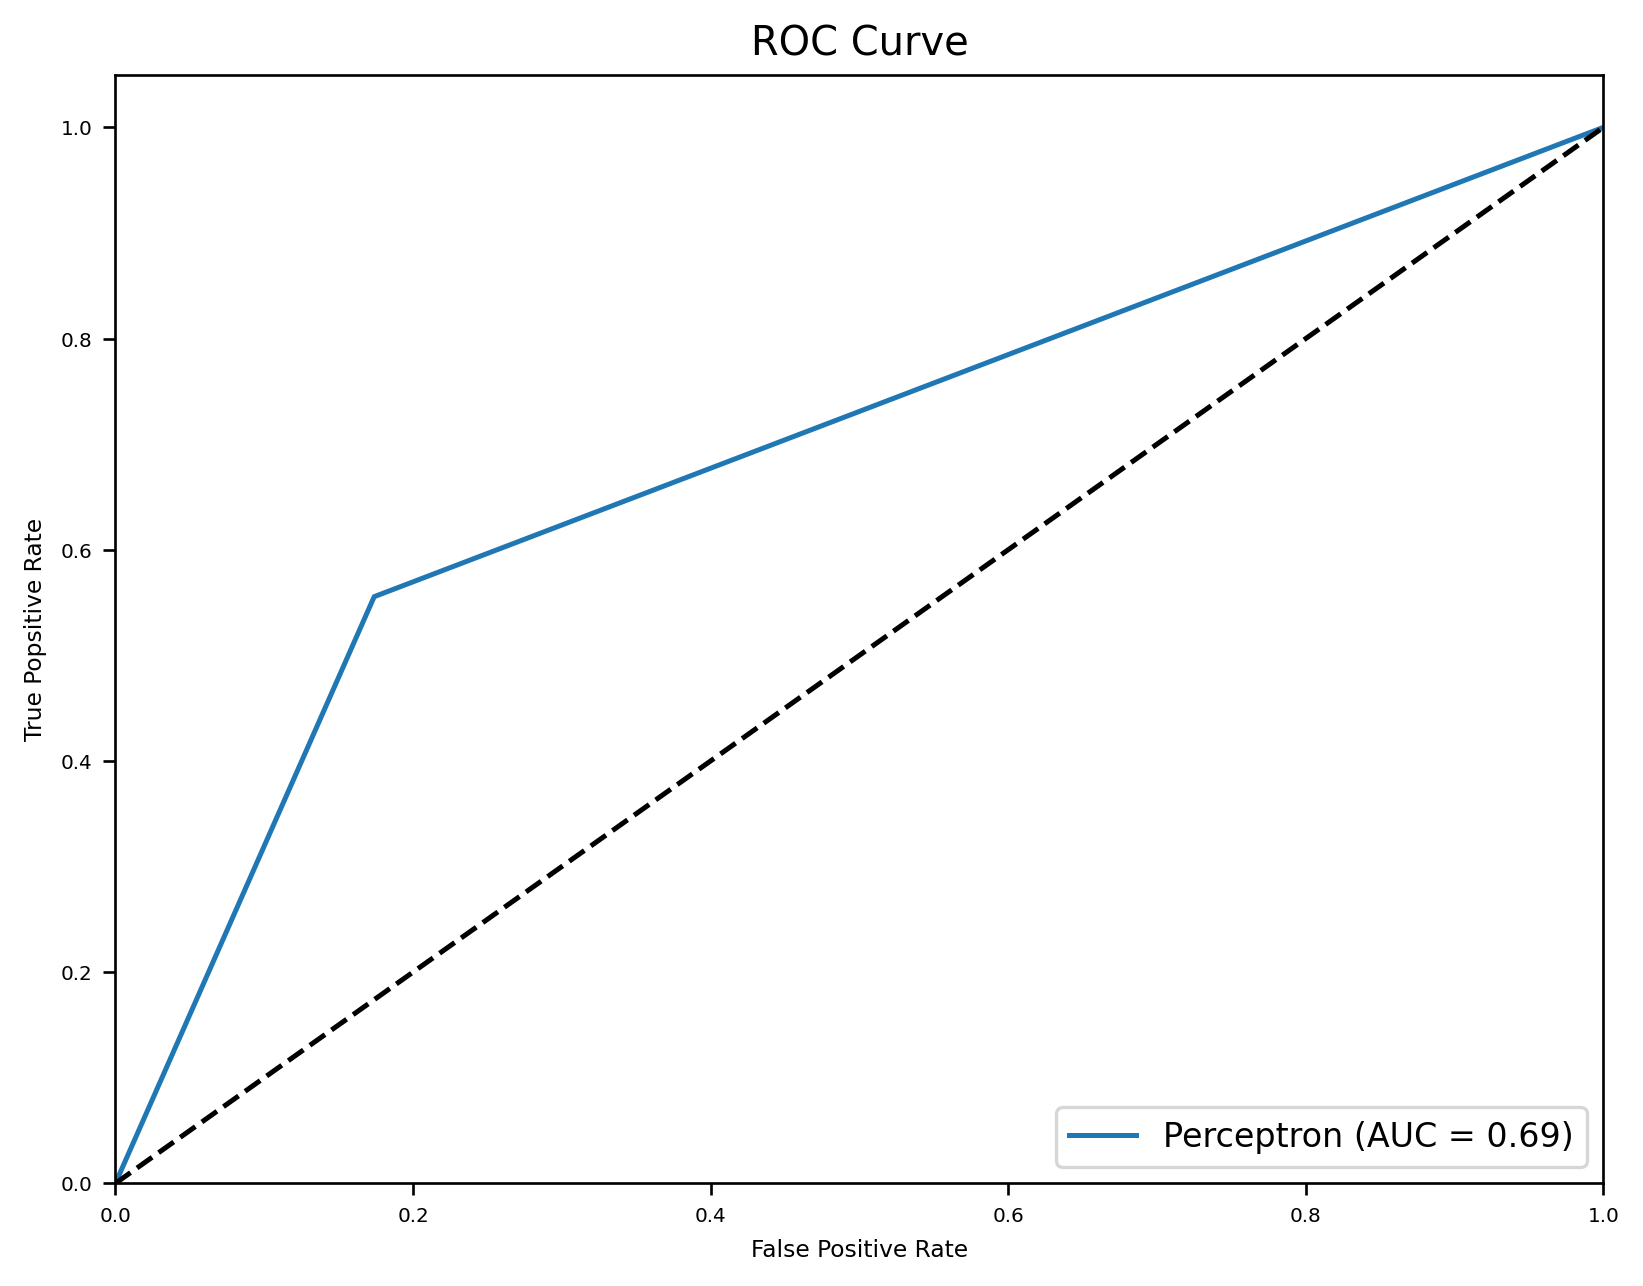

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Perceptron (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Popsitive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()